In [2]:
# 라이브러리 불러오기
import numpy as np # 노메딕 컴퓨터이션?
import pandas as pd # 데이터 프레임
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

import sklearn #다양한 머신러닝 알고리즘
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2.csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [32]:
#파일읽기
game = pd.read_csv ('vgames2.csv')
#파일 정보 확인 > 숫자가 오브젝트이다!
game.info() 
game.sample(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8974,8975,Final Fantasy Crystal Chronicles: Echoes of Time,DS,2009.0,Role-Playing,Square Enix,0.12,0.06,0.27,0.02
6020,6021,MXGP 2,PS4,2016.0,Racing,Milestone S.r.l.,0.02,0.05,0,0.01
10446,10447,Strike Witches: Anata to Dekiru Koto - A Littl...,PS2,2010.0,Action,Russel,0,0,0.02,0
11072,11073,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0,0,0.01,0K
1589,1590,Yu-Gi-Oh! 5D's Stardust Accelerator: World Cha...,DS,2009.0,Action,Konami Digital Entertainment,0.27,0.01,0.09,0.03
13236,13237,Invizimals,PSP,2009.0,Strategy,Sony Computer Entertainment,0.17,0.51,0,0.11
2737,2738,Harvey Birdman: Attorney at Law,Wii,2008.0,Adventure,Capcom,0.08,0,0,0.01
8896,8897,Super Swing Golf Season 2,Wii,2007.0,Sports,Rising Star Games,0.08,0,0.03,0.01
5424,5425,Shijyou Saikyou no Deshi Kenichi: Gekitou! Rag...,PS2,2007.0,Fighting,Capcom,0,0,0.01,0
7721,7722,Marvel Super Hero Squad: The Infinity Gauntlet,X360,2010.0,Action,THQ,0.12,0.02,0,0.01


In [5]:
game.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 중복 데이터 확인 > 중복 데이터가 없다고 뜬다
game.duplicated().sum()
#결측값 확인
game.isnull().sum()
game.dropna(axis = 0, inplace=True) # 결측값 제거,inplace를 쓰면 변수 없이 저장이 가능하다.
game.reset_index() # index
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


Feature Engineering
Garbage In, Garbage Out!

In [7]:
#데이터 손실 방지 위해 카피
game1 = game.copy()

game1['NA_Sales']=game1['NA_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)
game1['EU_Sales']=game1['EU_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)
game1['JP_Sales']=game1['JP_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)
game1['Other_Sales']=game1['Other_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)

In [31]:
game1['NA_Sales'].unique()
game1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 14264 to 6906
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16141 non-null  int64  
 1   Name         16141 non-null  object 
 2   Platform     16141 non-null  object 
 3   Year         16141 non-null  float64
 4   Genre        16141 non-null  object 
 5   Publisher    16141 non-null  object 
 6   NA_Sales     16141 non-null  float64
 7   EU_Sales     16141 non-null  float64
 8   JP_Sales     16141 non-null  float64
 9   Other_Sales  16141 non-null  float64
 10  All_Sales    16141 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
#1980년 이전 값 drop / 최초 게임은 1958년이나, 현재 데이터는 1980년도부터 전개되고 있다.
#그 외의 결측 데이터들은, 보편적으로 연도를 붙일 수는 있으나, 휴먼데이터 오류가 아니라는 확신을 내릴 수 없기에 삭제한다.
game1 = game1[game1.Year >= 1980]
game1 = game1.sort_values(by='Year' ,ascending=True)
game1.describe()


,Unnamed: 0,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000,16141.000000
mean,8292.228486,2006.406356,0.265156,0.147319,0.077951,0.048224
std,4792.105258,5.830780,0.822621,0.508480,0.306771,0.189939
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,4143.000000,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,8284.000000,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,12444.000000,2010.000000,0.240000,0.110000,0.040000,0.040000
max,16598.000000,2020.000000,41.490000,29.020000,10.220000,10.570000


In [10]:
game2=game1[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]
#game2 = game - regeion sales
game2=game1.groupby(game1.Genre)['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum()
game2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.96,512.52,155.73,183.64
Adventure,101.33,63.32,51.79,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,394.29,207.68,103.71,72.54
Platform,442.46,199.40,129.22,51.15


In [11]:
game2.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,12.000000,12.000000,12.000000,12.000000
mean,356.656667,198.155833,104.850833,64.865833
std,243.972254,142.248523,82.610229,52.455834
min,67.820000,44.700000,37.340000,11.200000
25%,166.030000,90.620000,54.512500,27.590000
50%,330.325000,187.855000,74.925000,52.930000
75%,474.567500,252.465000,130.560000,82.377500
max,855.960000,512.520000,336.250000,183.640000


<BarContainer object of 12 artists>

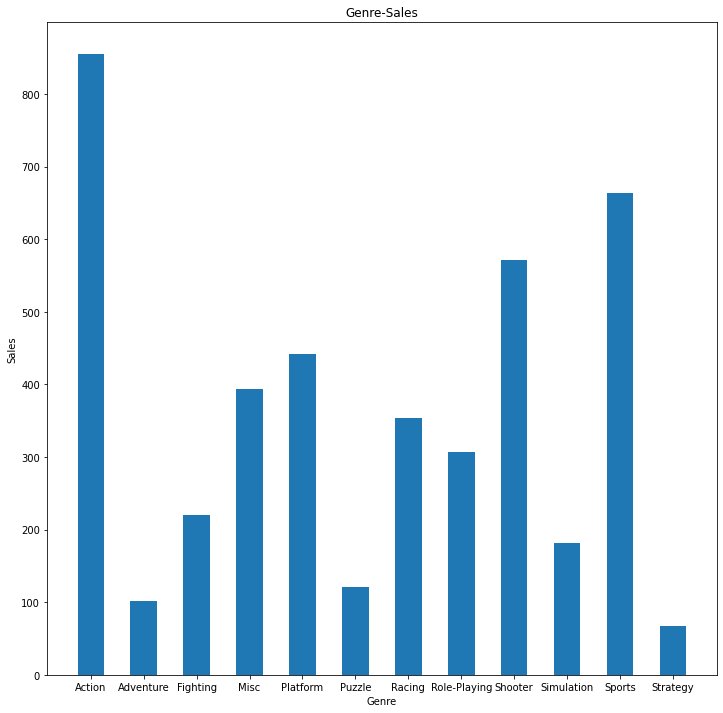

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 

games2NA=game1.groupby('Genre', as_index=False )['NA_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games2NA['Genre'], games2NA['NA_Sales'], width=0.5)

<BarContainer object of 31 artists>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


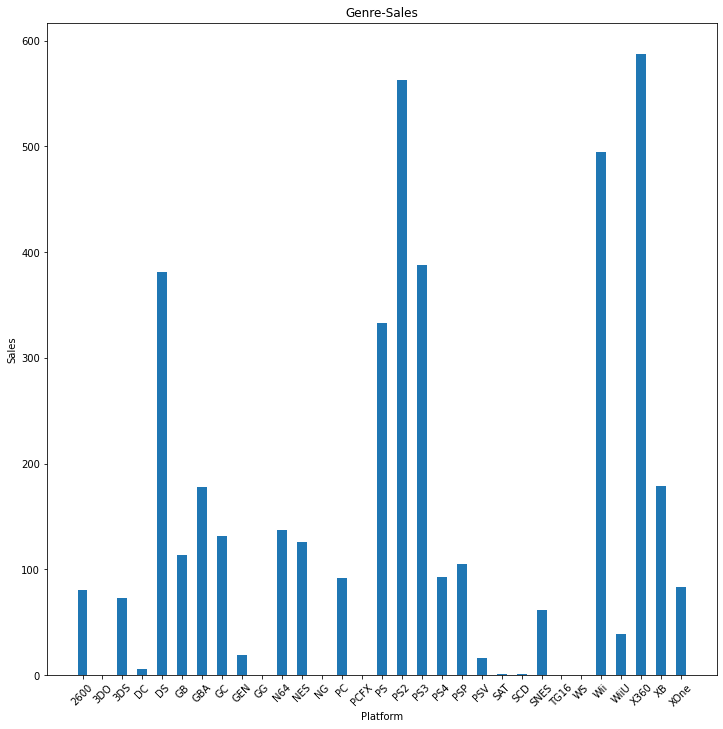

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 

games_PLF_NA=game1.groupby('Platform', as_index=False )['NA_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_NA['Platform'], games_PLF_NA['NA_Sales'], width=0.5)

<BarContainer object of 10 artists>

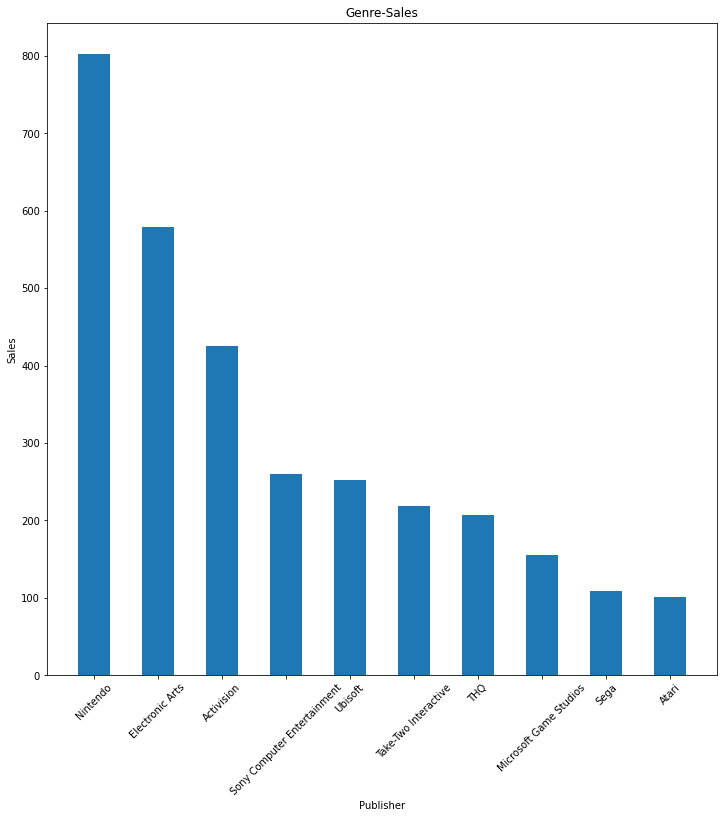

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
game12=game1[['NA_Sales','Publisher']]

games_PUB_NA=game12.groupby('Publisher', as_index=False )['NA_Sales'].sum()
games_PUB_NA.sort_values(by=['NA_Sales'], ascending=False, inplace=True)

games_PUB_NA1=games_PUB_NA.head(10)

plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Publisher')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PUB_NA1['Publisher'],games_PUB_NA1['NA_Sales'], width=0.5)

<BarContainer object of 12 artists>

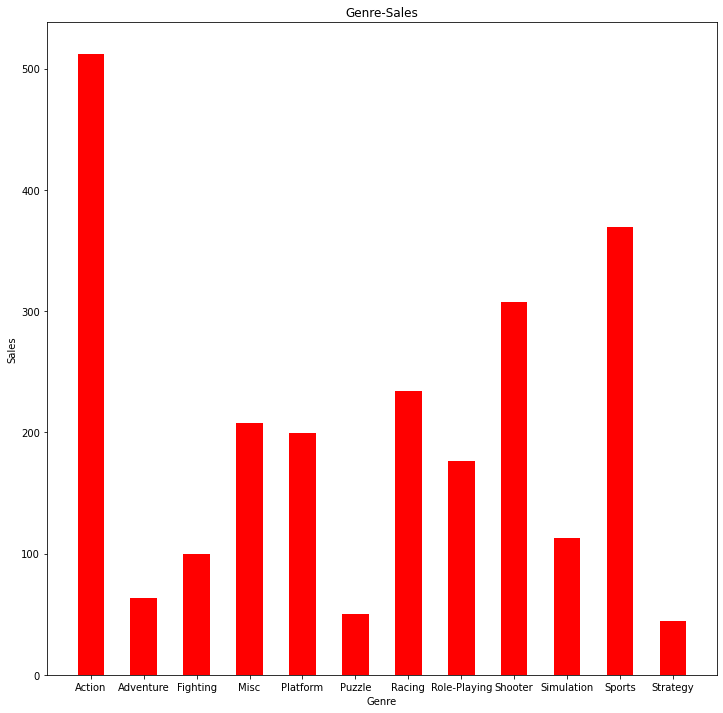

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 

games2EU=game1.groupby('Genre', as_index=False )['EU_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games2EU['Genre'], games2EU['EU_Sales'], width=0.5, color = 'r')

<BarContainer object of 31 artists>

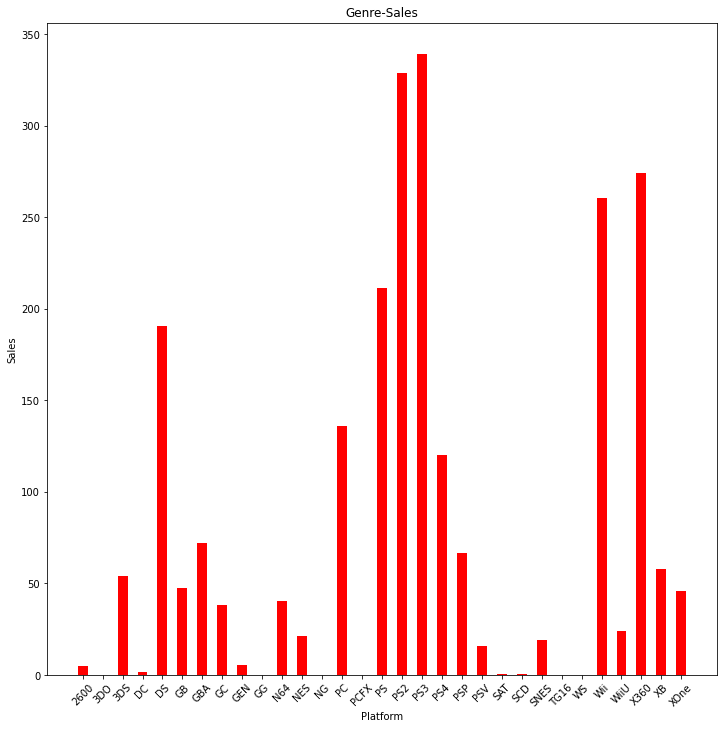

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 

games_PLF_EU=game1.groupby('Platform', as_index=False )['EU_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_EU['Platform'], games_PLF_EU['EU_Sales'], width=0.5, color = 'r')

<BarContainer object of 10 artists>

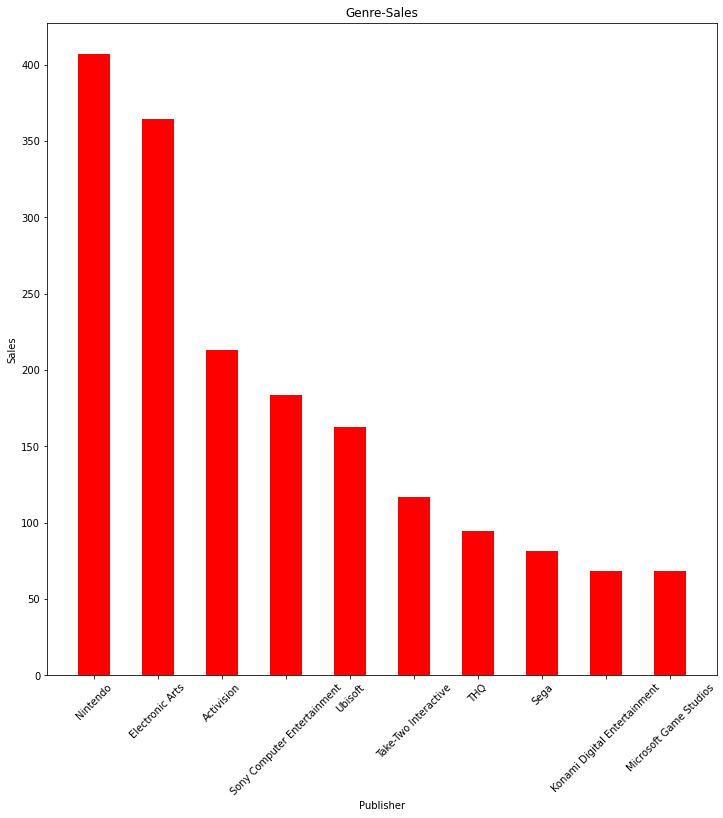

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
game12=game1[['EU_Sales','Publisher']]

games_PLF_EU=game12.groupby('Publisher', as_index=False )['EU_Sales'].sum()
games_PLF_EU.sort_values(by=['EU_Sales'], ascending=False, inplace=True)

games_PLF_EU1=games_PLF_EU.head(10)

plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Publisher')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_EU1['Publisher'],games_PLF_EU1['EU_Sales'], width=0.5, color='r')

<BarContainer object of 12 artists>

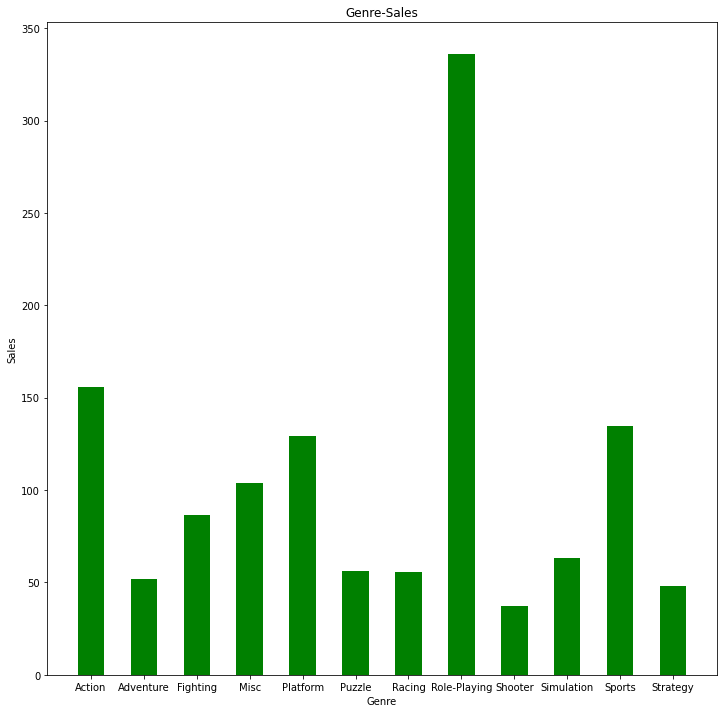

In [18]:


import pandas as pd 
import matplotlib.pyplot as plt 

games2JP=game1.groupby('Genre', as_index=False )['JP_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games2JP['Genre'], games2JP['JP_Sales'], width=0.5, color = 'g')

<BarContainer object of 31 artists>

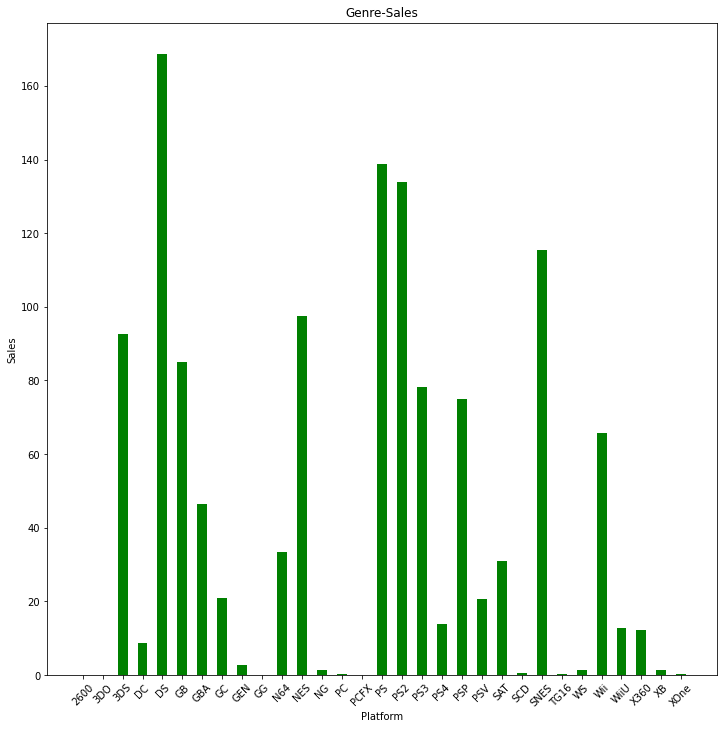

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 

games_PLF_JP=game1.groupby('Platform', as_index=False )['JP_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_JP['Platform'], games_PLF_JP['JP_Sales'], width=0.5, color = 'g')

<BarContainer object of 10 artists>

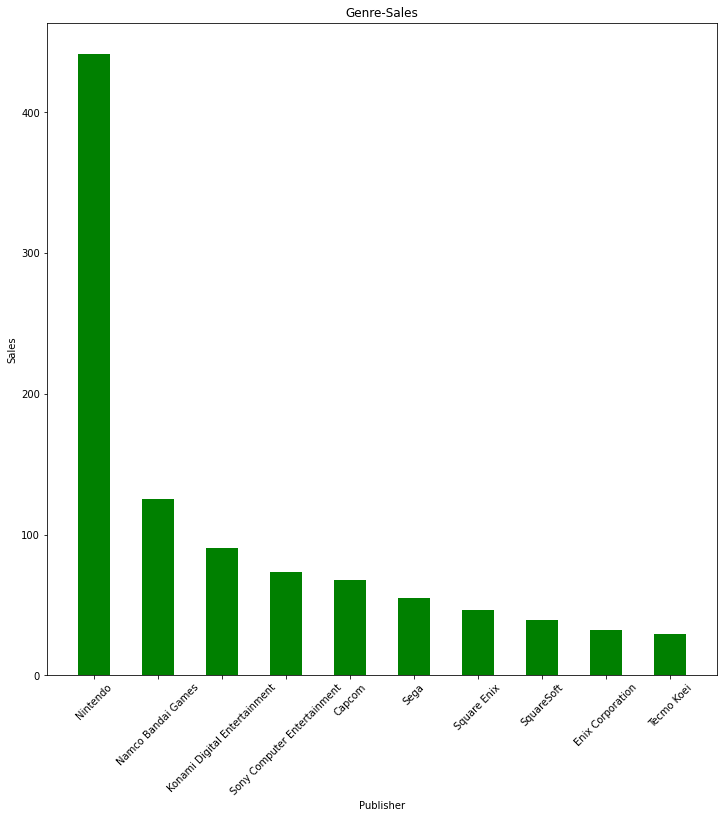

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
game12=game1[['JP_Sales','Publisher']]

games_PLF_JP=game12.groupby('Publisher', as_index=False )['JP_Sales'].sum()
games_PLF_JP.sort_values(by=['JP_Sales'], ascending=False, inplace=True)

games_PLF_JP1=games_PLF_JP.head(10)

plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Publisher')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_JP1['Publisher'],games_PLF_JP1['JP_Sales'], width=0.5, color = 'g')

<BarContainer object of 12 artists>

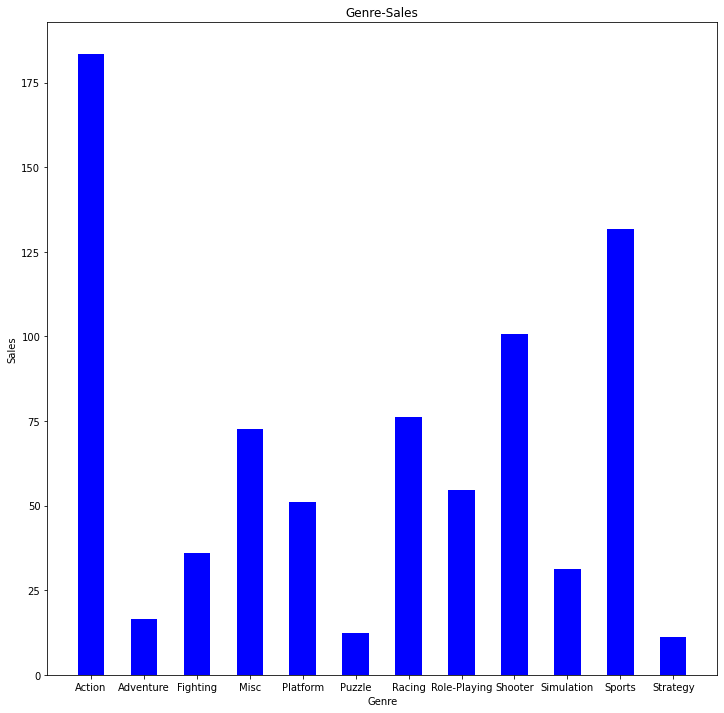

In [21]:

import pandas as pd 
import matplotlib.pyplot as plt 

games2OT=game1.groupby('Genre', as_index=False )['Other_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Genre')
plt.ylabel('Sales')

plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games2OT['Genre'], games2OT['Other_Sales'], width=0.5, color = 'b')

<BarContainer object of 31 artists>

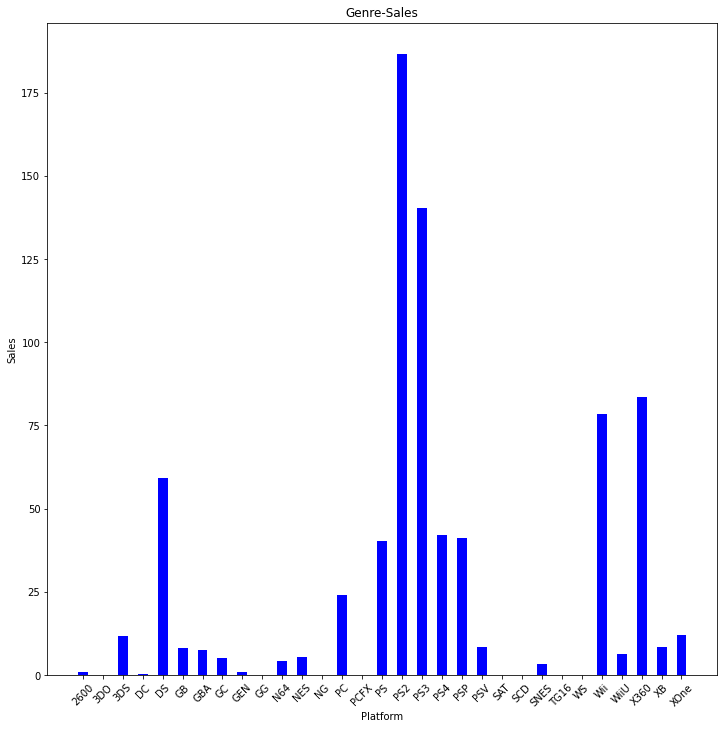

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 

games_PLF_OT=game1.groupby('Platform', as_index=False )['Other_Sales'].sum()


plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_OT['Platform'], games_PLF_OT['Other_Sales'], width=0.5, color = 'b')

<BarContainer object of 10 artists>

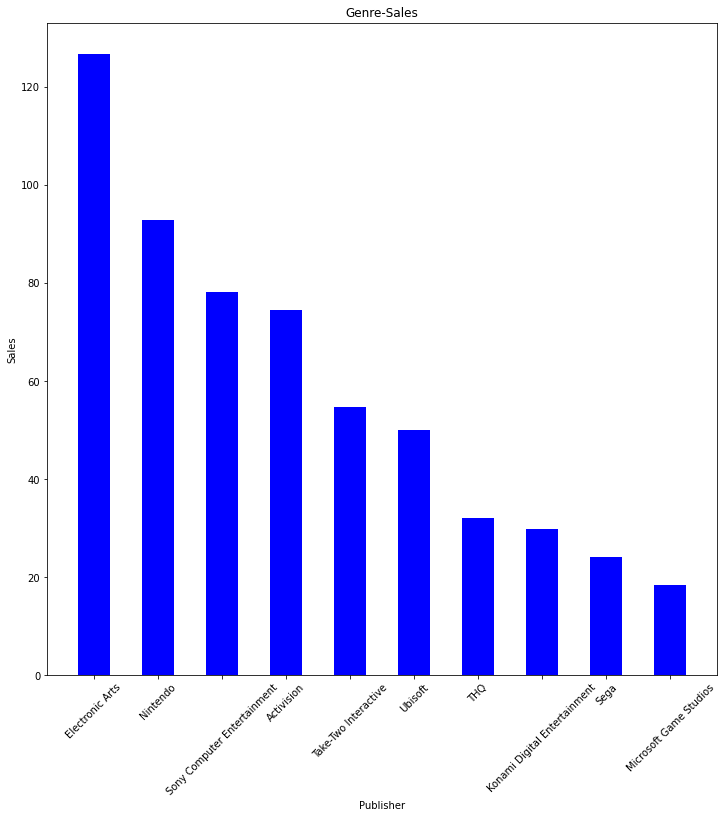

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
game12=game1[['Other_Sales','Publisher']]

games_PLF_OT=game12.groupby('Publisher', as_index=False )['Other_Sales'].sum()
games_PLF_OT.sort_values(by=['Other_Sales'], ascending=False, inplace=True)

games_PLF_OT1=games_PLF_OT.head(10)

plt.figure(figsize=(12,12))
plt.title('Genre-Sales')
plt.xlabel('Publisher')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.rc('font', family = 'AppleGothic')
plt.rc('font', size = 10)
plt.bar(games_PLF_OT1['Publisher'],games_PLF_OT1['Other_Sales'], width=0.5, color = 'b')

<Figure size 432x288 with 0 Axes>

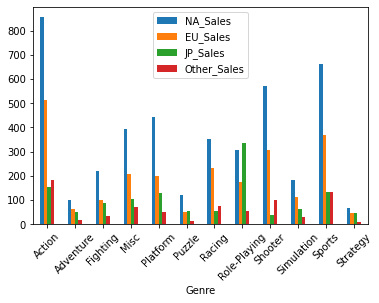

In [24]:
plt.figure()
game2.plot.bar()
plt.xticks(rotation=45)
plt.show()

# 2. 연도별 게임의 트렌드가 **있을까**
  2-1.장르

In [25]:
#game3 = year + regeions_sales

game1['All_Sales']= game1['NA_Sales']+game1['EU_Sales']+game1['JP_Sales']+game1['Other_Sales']


game3 = game1[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
game3=game1.groupby(["Year","Genre"],as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

#game3= game3.reset_index(drop=True, inplace=True)
game4=game1.groupby(["Year","Genre"],as_index=False)['All_Sales'].sum() # as_index=False : 인덱스로 지정
game4

,Year,Genre,All_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.70
3,1980.0,Shooter,7.07
4,1981.0,Action,14.79
...,...,...,...
383,2016.0,Sports,14.46
384,2016.0,Strategy,0.52
385,2017.0,Action,0.01
386,2017.0,Role-Playing,0.04


In [26]:
game3.describe()

NA_Sales                                                       EU_Sales  \
       count      mean       std   min     25%   50%     75%   max    count   
0        1.0  0.320000       NaN  0.32  0.3200  0.32  0.3200  0.32      1.0   
1        1.0  0.720000       NaN  0.72  0.7200  0.72  0.7200  0.72      1.0   
2        4.0  0.632500  0.460317  0.22  0.2425  0.62  1.0100  1.07      4.0   
3        2.0  3.280000  1.018234  2.56  2.9200  3.28  3.6400  4.00      2.0   
4       25.0  0.554400  0.463969  0.15  0.3000  0.38  0.6500  2.06     25.0   
..       ...       ...       ...   ...     ...   ...     ...   ...      ...   
383     37.0  0.123514  0.239574  0.00  0.0000  0.02  0.1300  0.92     37.0   
384     10.0  0.011000  0.028067  0.00  0.0000  0.00  0.0075  0.09     10.0   
385      1.0  0.000000       NaN  0.00  0.0000  0.00  0.0000  0.00      1.0   
386      2.0  0.000000  0.000000  0.00  0.0000  0.00  0.0000  0.00      2.0   
387      1.0  0.270000       NaN  0.27  0.2700  0.27  0.2700  0.27      1.0   

               ... JP_Sales       Other_Sales                            \
         mean  ...      75%   max       count      mean       std   min   
0    0.020000  ...    0.000  0.00         1.0  0.000000       NaN  0.00   
1    0.040000  ...    0.000  0.00         1.0  0.010000       NaN  0.01   
2    0.037500  ...    0.000  0.00         4.0  0.005000  0.005774  0.00   
3    0.215000  ...    0.000  0.00         2.0  0.040000  0.014142  0.03   
4    0.032400  ...    0.000  0.00        25.0  0.004800  0.006532  0.00   
..        ...  ...      ...   ...         ...       ...       ...   ...   
383  0.198919  ...    0.010  0.17        37.0  0.051892  0.121811  0.00   
384  0.032000  ...    0.000  0.05        10.0  0.004000  0.006992  0.00   
385  0.000000  ...    0.010  0.01         1.0  0.000000       NaN  0.00   
386  0.000000  ...    0.025  0.03         2.0  0.000000  0.000000  0.00   
387  0.000000  ...    0.000  0.00         1.0  0.020000       NaN  0.02   

                                 
       25%    50%     75%   max  
0    0.000  0.000  0.0000  0.00  
1    0.010  0.010  0.0100  0.01  
2    0.000  0.005  0.0100  0.01  
3    0.035  0.040  0.0450  0.05  
4    0.000  0.000  0.0100  0.02  
..     ...    ...     ...   ...  
383  0.000  0.010  0.0400  0.69  
384  0.000  0.000  0.0075  0.02  
385  0.000  0.000  0.0000  0.00  
386  0.000  0.000  0.0000  0.00  
387  0.020  0.020  0.0200  0.02  

[388 rows x 32 columns]

"\nplt.figure(figsize=(20,12))\nplt.title('Year-Sales')\nplt.xlabel('Year')\nplt.ylabel('Sales') \n#>> 따로 뽑아내면 안나옴 . plt만 되어있는건 내가 적은 데이터만 불러와라\nplt.plot(game4)\nplt.legend()"

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


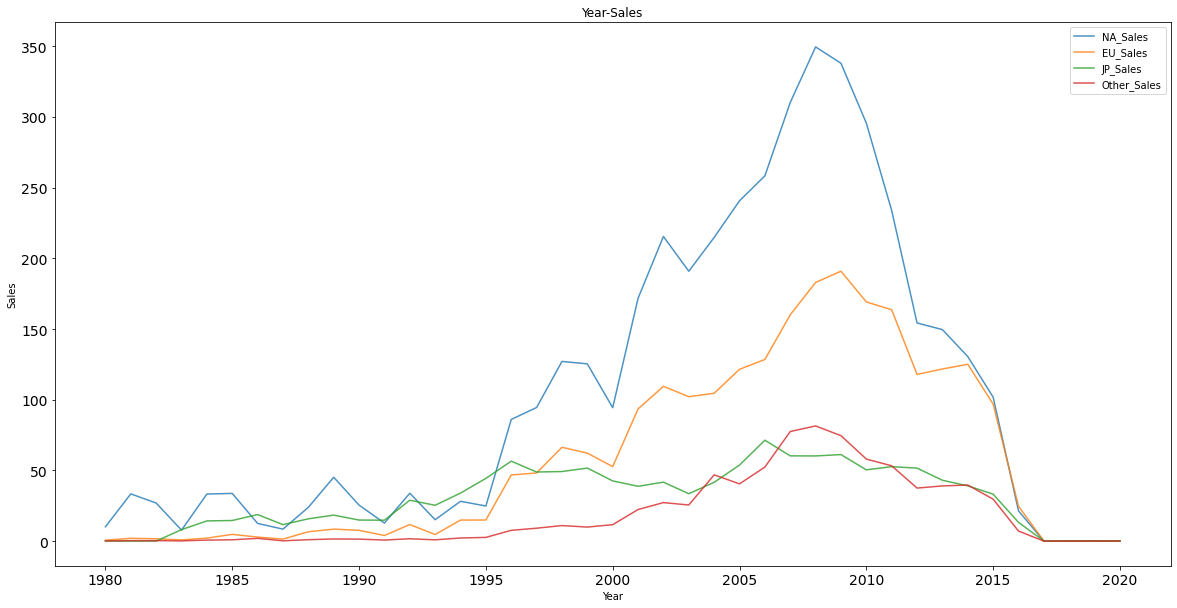

In [27]:

game3_1 = game1.groupby(['Year']).sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
#game4 = game3.groupby(['Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()
game3_1.plot(fontsize=14, alpha=0.8, figsize=(20,10), title='Year-Sales', xlabel='Year', ylabel='Sales');
# 플롯을 바로 데이터에 적용하면 라벨명이 정렬되서 나옴 , 옆에 주석도 기본적으로 같이 달림.
#plot는 기본적으로 라벨 = 범례를 가지고 있다.


"""
plt.figure(figsize=(20,12))
plt.title('Year-Sales')
plt.xlabel('Year')
plt.ylabel('Sales') 
#>> 따로 뽑아내면 안나옴 . plt만 되어있는건 내가 적은 데이터만 불러와라
plt.plot(game4)
plt.legend()"""

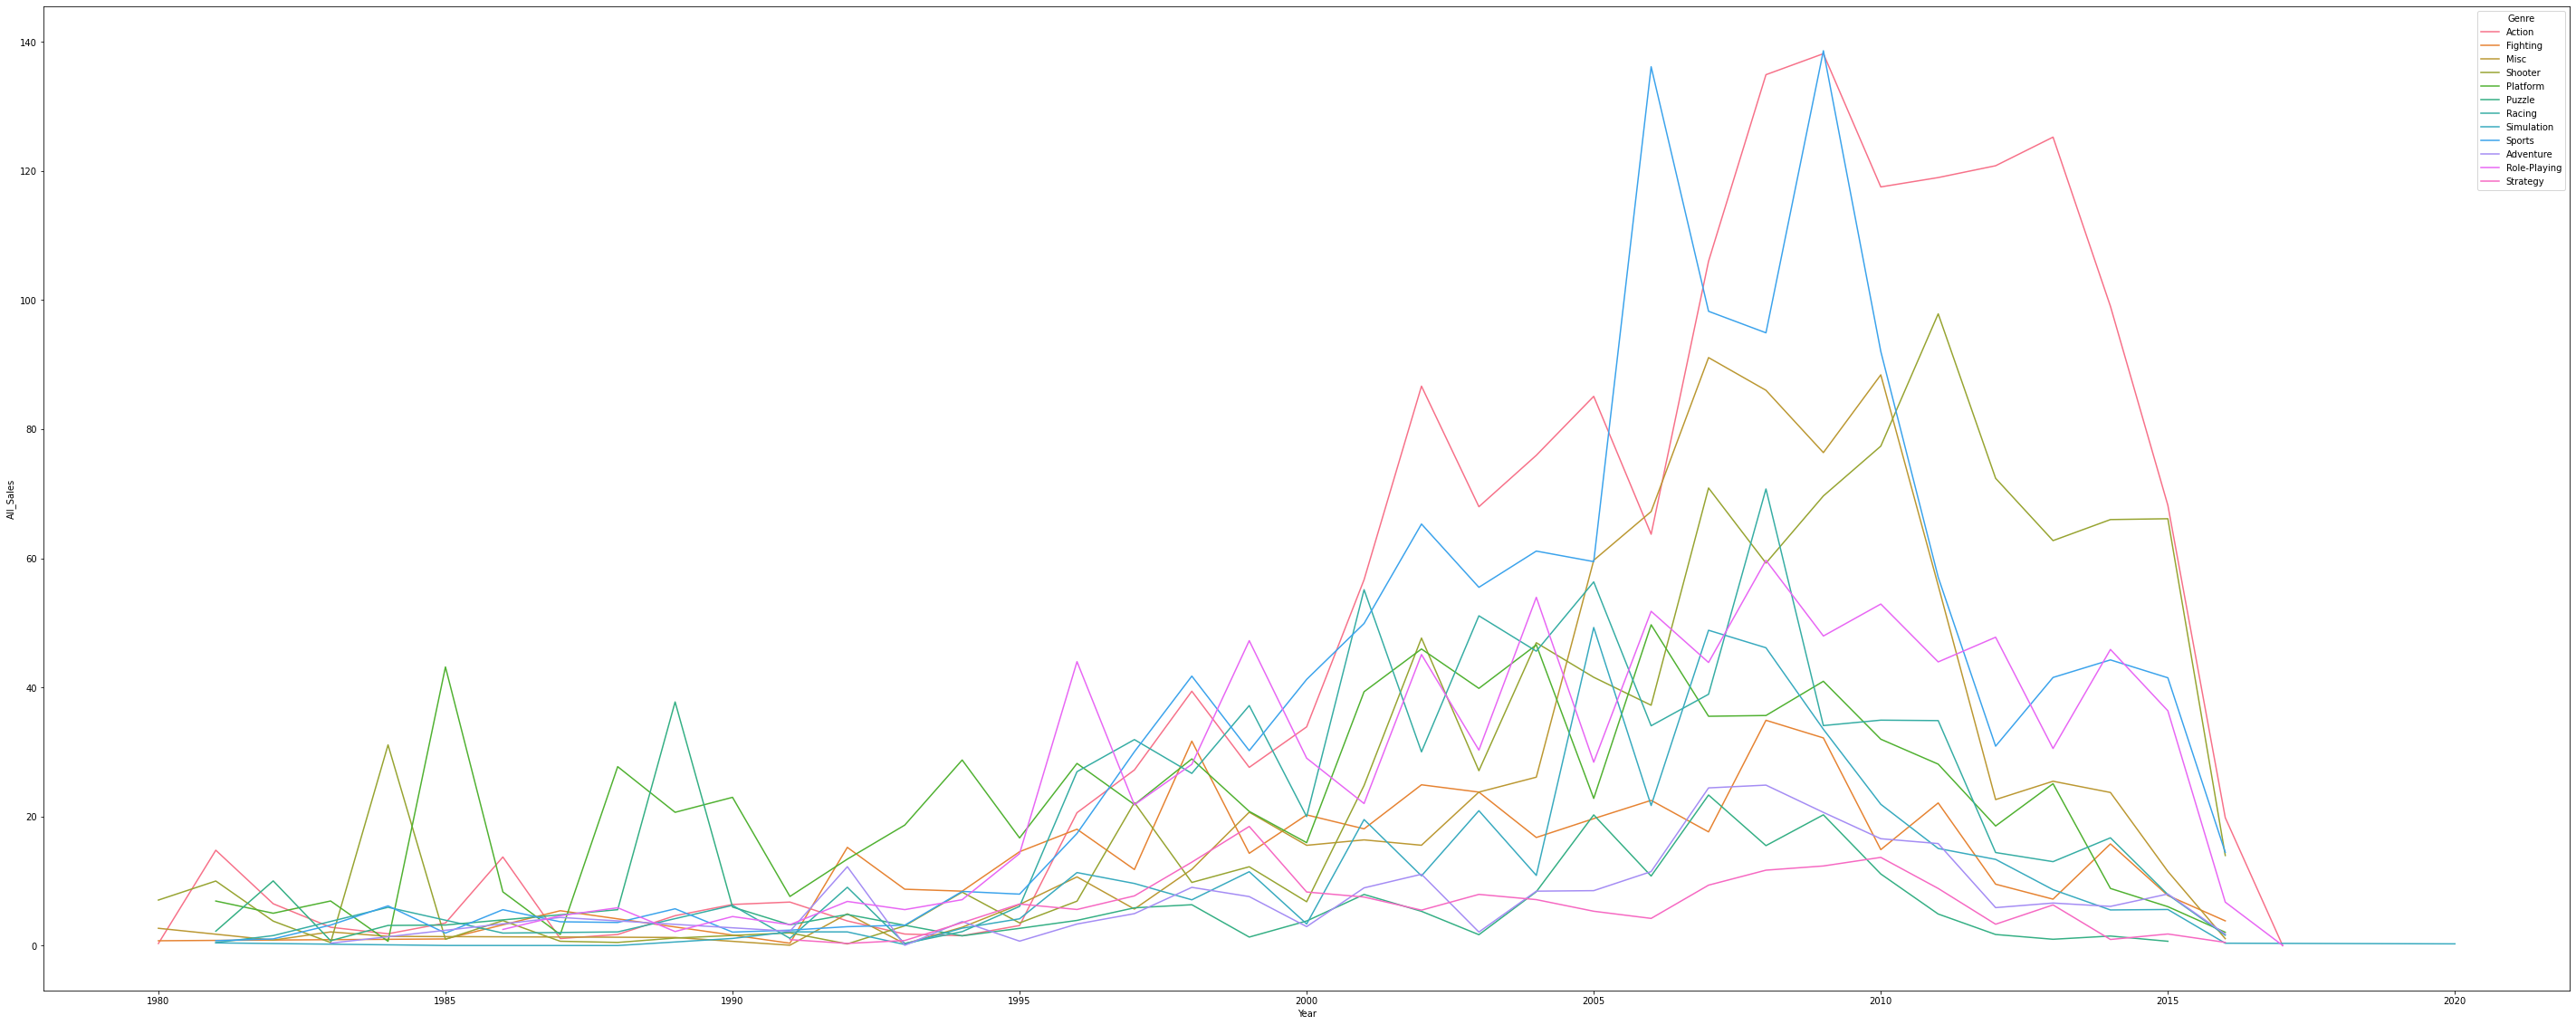

In [28]:
plt.figure(figsize=(50,20))
sns.lineplot(x='Year',y='All_Sales',data=game4,hue='Genre')

In [38]:
def find_5Year(Years):
  if Years>= 1980.0 and Years < 1985.0:
    return '80-84'
  elif Years>= 1985.0 and Years <1990.0:
    return '85-89'
  elif Years>= 1990.0 and Years <1995.0:
    return '90-94'
  elif Years>= 1995.0 and Years <2000.0:
    return '95-99'
  elif Years>= 2000.0 and Years <2005.0:
    return '00-04'   
  elif Years>= 2005.0 and Years <2010.0:
    return '05-09'    
  elif Years>= 2010.0 and Years <2015.0:
    return '10-14'
  else:
    return '15-20'

game4['Years']= [find_5Year(e) for e in game4.Year]

game5_2['Years']= [find_5Year(e) for e in game5_2.Year]

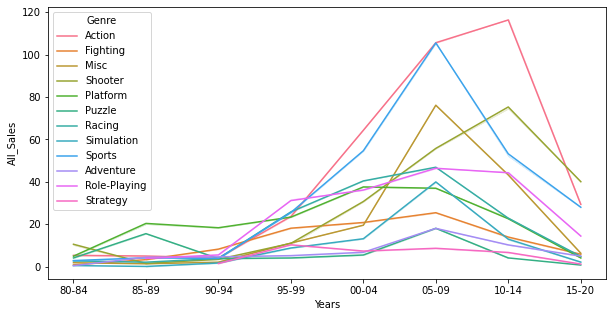

In [34]:

plt.figure(figsize=(10,5))
sns.lineplot(x='Years',y='All_Sales',data=game4,hue='Genre',ci=False)

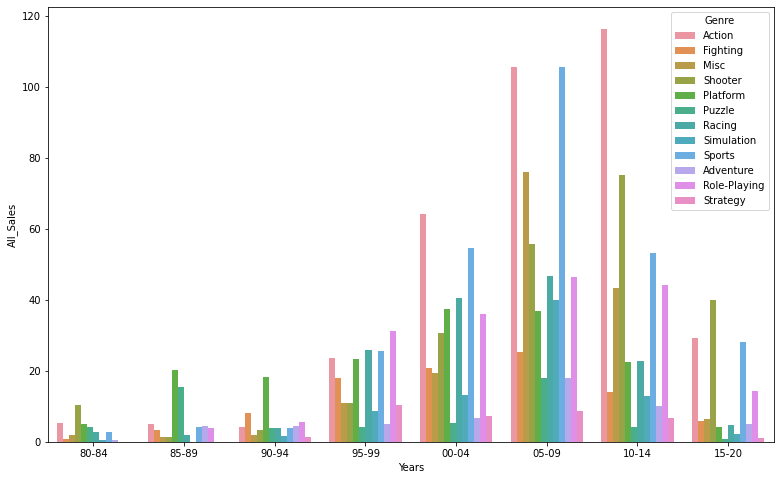

In [35]:
plt.figure(figsize=(13,8))

sns.barplot(x='Years',y='All_Sales',data=game4,hue='Genre', ci=False)

In [36]:
games_year1=game1.groupby(['Year','Genre']).sum()
games_year1.drop(columns=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1)

Unnamed: 0  All_Sales
Year   Genre                              
1980.0 Action             13134       0.34
       Fighting           14265       0.77
       Misc               32606       2.70
       Shooter            20737       7.07
1981.0 Action            218418      14.79
...                         ...        ...
2016.0 Sports            369852      14.46
       Strategy           77904       0.52
2017.0 Action              5311       0.01
       Role-Playing       25342       0.04
2020.0 Simulation          6907       0.29

[388 rows x 2 columns]

2-2. 플랫폼

In [37]:
#game3 = year + regeions_sales + Platform

#game1['All_Sales']= game1['NA_Sales']+game1['EU_Sales']+game1['JP_Sales']+game1['Other_Sales']


game5 = game1[['Year','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
game5_1=game5.groupby(["Year","Platform"],as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

#game3= game3.reset_index(drop=True, inplace=True)
game5_2=game1.groupby(["Year","Platform"],as_index=False)['All_Sales'].sum() # as_index=False : 인덱스로 지정
game5_2

,Year,Platform,All_Sales
0,1980.0,2600,10.88
1,1981.0,2600,35.68
2,1982.0,2600,28.88
3,1983.0,2600,5.84
4,1983.0,NES,10.96
...,...,...,...
236,2016.0,X360,0.83
237,2016.0,XOne,12.38
238,2017.0,PS4,0.03
239,2017.0,PSV,0.02


In [39]:
game_plt = game5_2[game5_2.Years== '80-84']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
0,80-84,2600,81.55
1,80-84,NES,61.04


In [40]:
game_plt = game5_2[game5_2.Years== '85-89']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
3,85-89,NES,161.42
2,85-89,GB,66.40
0,85-89,2600,4.43
4,85-89,PC,0.07
1,85-89,DS,0.02


In [42]:
game_plt = game5_2[game5_2.Years== '90-94']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
10,90-94,SNES,150.43
1,90-94,GB,48.13
2,90-94,GEN,28.35
4,90-94,NES,27.54
6,90-94,PC,15.87
7,90-94,PS,6.03
8,90-94,SAT,3.65
9,90-94,SCD,1.86
5,90-94,NG,1.01
3,90-94,GG,0.04


In [41]:
game_plt = game5_2[game5_2.Years== '95-99']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
7,95-99,PS,576.90
3,95-99,N64,178.46
2,95-99,GB,110.90
9,95-99,SNES,48.41
5,95-99,PC,34.09
8,95-99,SAT,28.69
1,95-99,DC,8.54
11,95-99,WS,0.46
4,95-99,NG,0.43
10,95-99,TG16,0.16


In [43]:
game_plt = game5_2[game5_2.Years== '00-04']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
8,00-04,PS2,796.59
3,00-04,GBA,264.79
11,00-04,XB,186.43
4,00-04,GC,156.43
7,00-04,PS,140.55
6,00-04,PC,37.72
5,00-04,N64,37.21
2,00-04,GB,28.80
1,00-04,DS,17.41
0,00-04,DC,7.35


In [44]:
game_plt = game5_2[game5_2.Years== '05-09']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
8,05-09,Wii,676.22
1,05-09,DS,668.73
9,05-09,X360,411.91
5,05-09,PS2,410.16
6,05-09,PS3,345.15
7,05-09,PSP,218.04
10,05-09,XB,59.80
4,05-09,PC,45.16
2,05-09,GBA,39.75
3,05-09,GC,39.15


In [45]:
game_plt = game5_2[game5_2.Years== '10-14']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
4,10-14,PS3,579.45
10,10-14,X360,531.95
8,10-14,Wii,221.52
0,10-14,3DS,197.86
5,10-14,PS4,121.21
1,10-14,DS,113.57
2,10-14,PC,108.72
11,10-14,XOne,71.05
9,10-14,WiiU,62.14
6,10-14,PSP,61.91


In [46]:
game_plt = game5_2[game5_2.Years== '15-20']
game_plt1 = game_plt.groupby(['Years','Platform'],as_index=False)['All_Sales'].sum() # groupby에 sum 필수
game_plt1.sort_values(by=['All_Sales'], ascending=False)

,Years,Platform,All_Sales
4,15-20,PS4,147.94
10,15-20,XOne,70.03
0,15-20,3DS,33.36
3,15-20,PS3,20.65
8,15-20,WiiU,19.65
9,15-20,X360,13.85
2,15-20,PC,10.63
6,15-20,PSV,10.19
7,15-20,Wii,1.56
1,15-20,DS,0.29


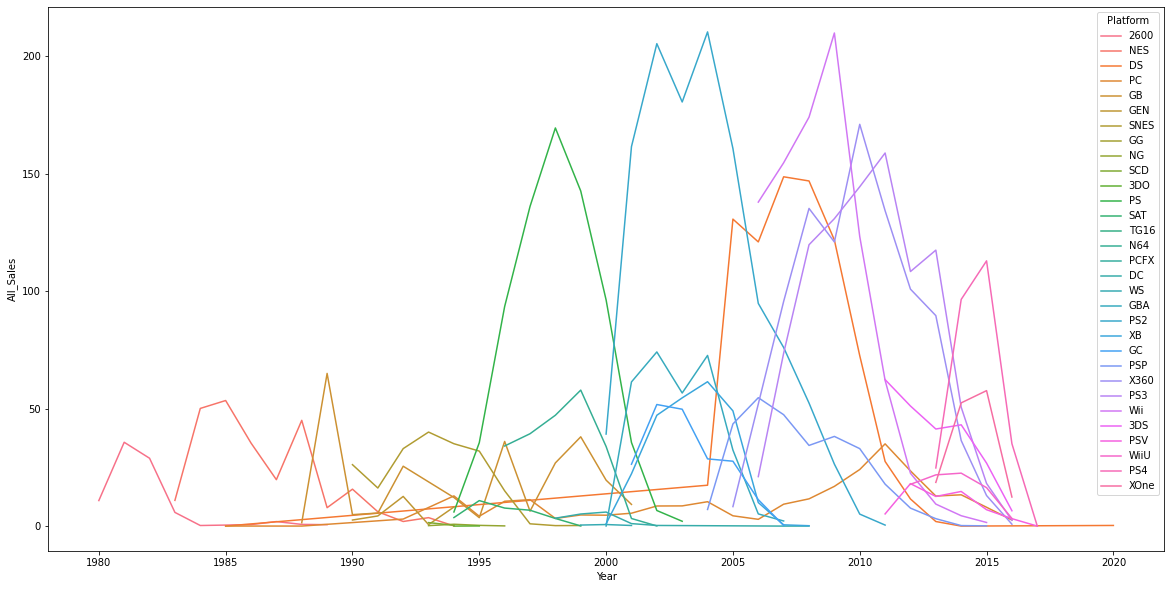

In [47]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year',y='All_Sales',data=game5_2,hue='Platform',ci=False)

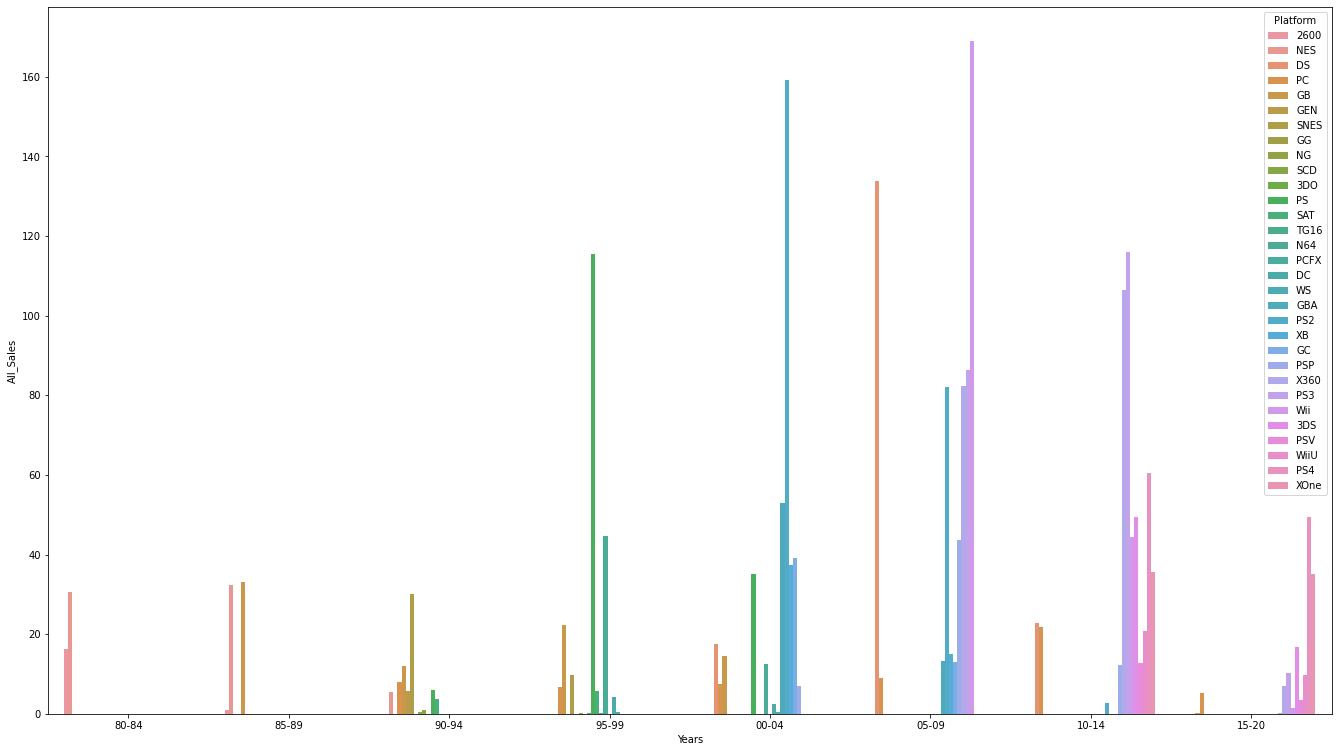

In [49]:
plt.figure(figsize=(23,13))

sns.barplot(x='Years',y='All_Sales',data=game5_2,hue='Platform', ci=False)

In [48]:
games_year2=game1.groupby(['Year','Platform']).sum()
#
games_year2.drop(columns=["Unnamed: 0","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1)

All_Sales
Year   Platform           
1980.0 2600          10.88
1981.0 2600          35.68
1982.0 2600          28.88
1983.0 2600           5.84
       NES           10.96
...                    ...
2016.0 X360           0.83
       XOne          12.38
2017.0 PS4            0.03
       PSV            0.02
2020.0 DS             0.29

[241 rows x 1 columns]

출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [50]:
#game1.drop(columns=["Unnamed: 0"], inplace=True, axis=1)
game6= game1.sort_values(by=['All_Sales'], ascending=False)
game6_1=game6.head(30)
#출판사는 닌텐도가 압도적임을 알 수 있다.
game6_1

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
2908,2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


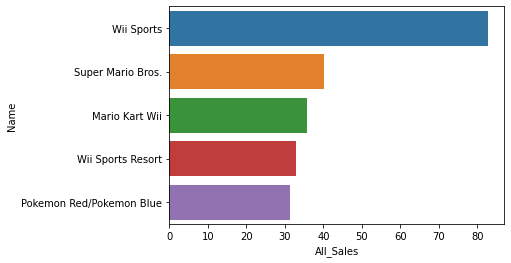

In [51]:
# 상위 데이터 5개 보기
game6_2=game6.head(5)
game6_2

sns.barplot(y='Name', x='All_Sales',data=game6_2,ci=False)



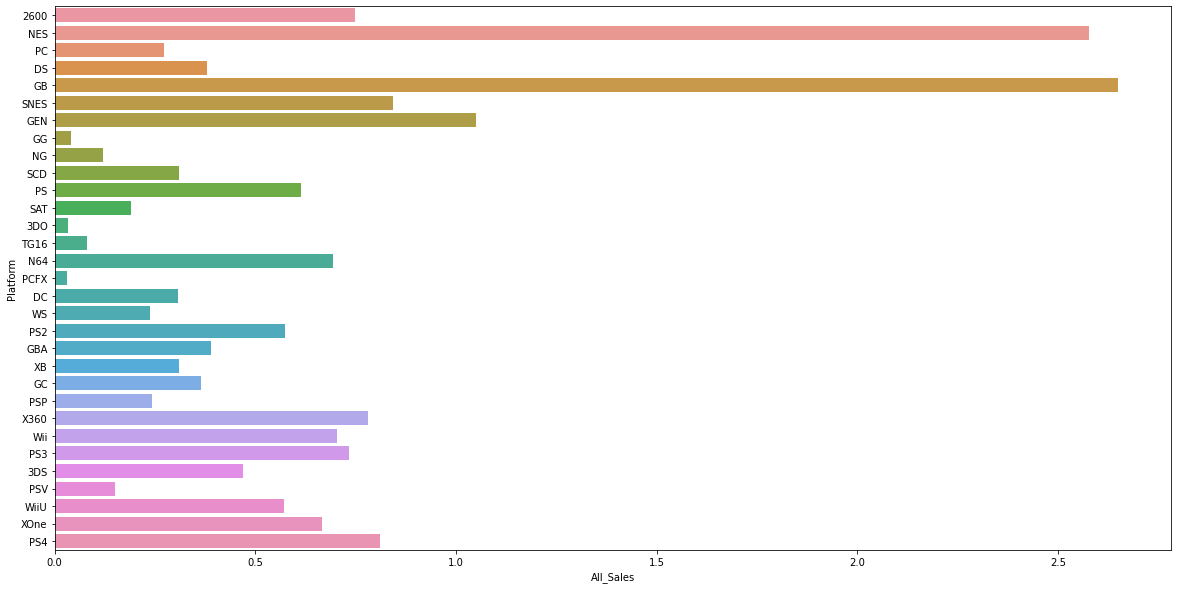

In [52]:
#플랫폼 순위나열
plt.figure(figsize=(20,10))
sns.barplot(y='Platform', x='All_Sales',data=game1,ci=False)

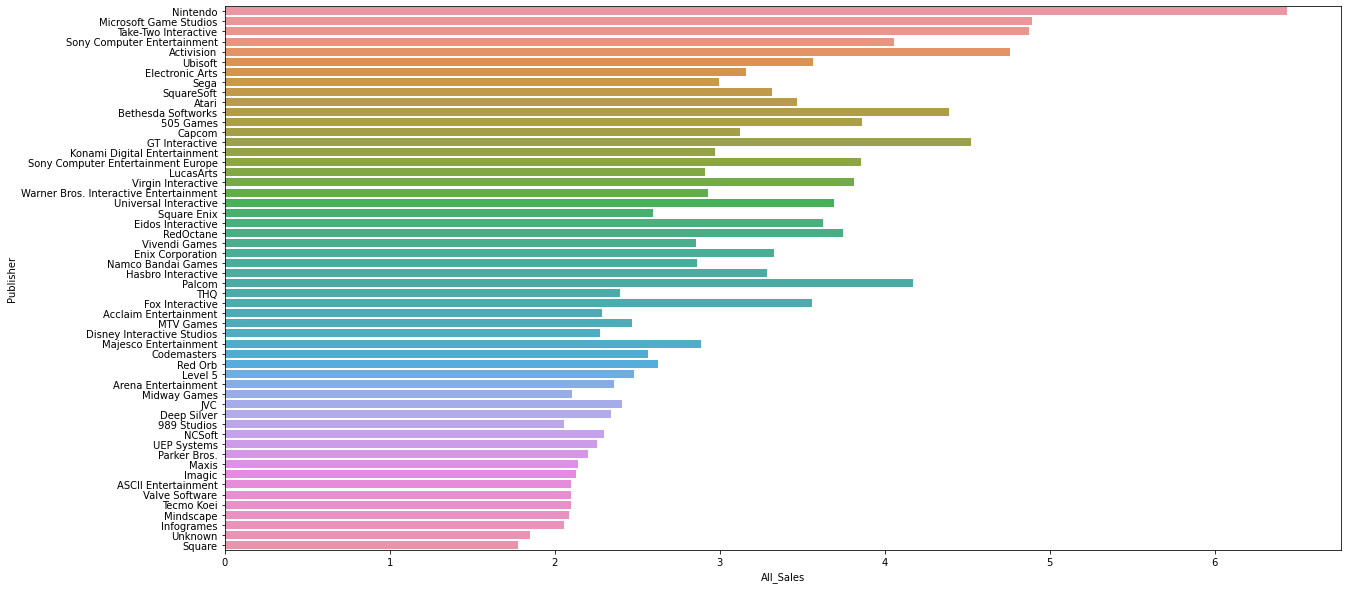

In [53]:
#출판사 순위 나열
game6= game1.sort_values(by=['All_Sales'], ascending=False)
game6_1=game6.head(1000)

plt.figure(figsize=(20,10))
sns.barplot(y='Publisher', x='All_Sales',data=game6_1,ci=False)

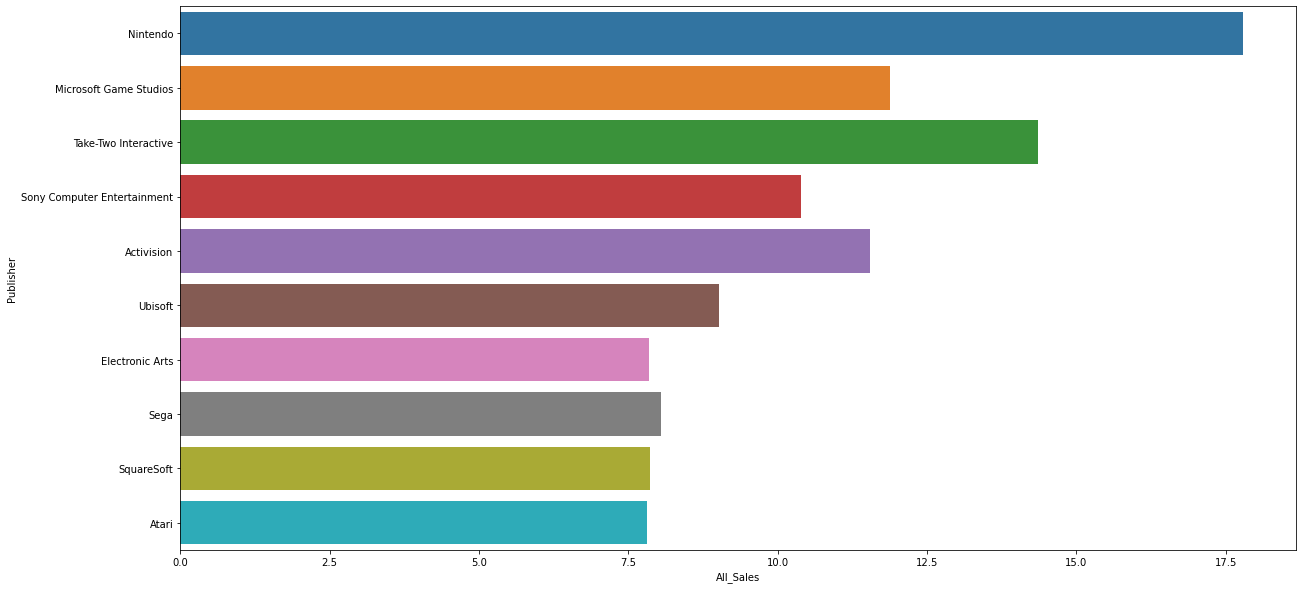

In [55]:
# 출판사 - 판매량 상위 100
game6_1_1=game6.head(100)

plt.figure(figsize=(20,10))
sns.barplot(y='Publisher', x='All_Sales',data=game6_1_1,ci=False)

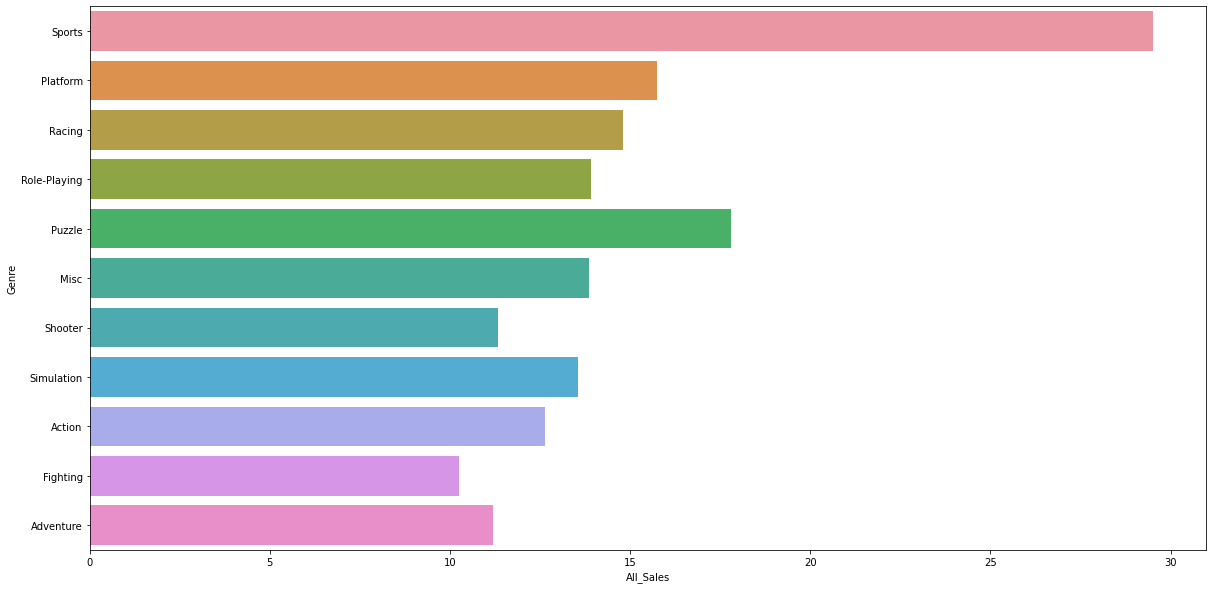

In [54]:
# 출판사 - 판매량 상위 100
game6_1_1=game6.head(100)

plt.figure(figsize=(20,10))
sns.barplot(y='Genre', x='All_Sales',data=game6_1_1,ci=False)